# LU Decomposition
$\newcommand{\AAA}{\mathbf{A}}$
$\newcommand{\BBB}{\mathbf{b}}$
$\newcommand{\XXX}{\mathbf{x}}$
$\newcommand{\UUU}{\mathbf{U}}$
$\newcommand{\YYY}{\mathbf{y}}$
$\newcommand{\LLL}{\mathbf{L}}$

LU decomposition is short for lower (L) upper (U) decomposition. It denotes the decomposition of a matrix $\mathbf{A}$ into a lower $\mathbf{L}$ and upper $\mathbf{U}$ matrix, so that the product of the lower and upper matrices gives the matrix $\mathbf{A}$:
\begin{equation}
\mathbf{A}  = \mathbf{L}\mathbf{U}
\end{equation}
LU decomposition is a common technique in linear algebra to solve systems of linear equations. It is thus an alternative method to the conjugate gradient method we considered in the previous section. Note that LU decomposition works for all equation systems $\mathbf{A}\mathbf{x} = \mathbf{b}$, not only the ones with symmetric and positive definite matrices $\mathbf{A}$.

If a matrix $\mathbf{A}$ can be written as the product of a lower triangular matrix, $\mathbf{L}$, and an upper triangular matrix $\mathbf{U} $, the corresponding equation system
\begin{equation}
\mathbf{A}\mathbf{x} = \mathbf{b}
\end{equation}
can be solved by reducing to two (simpler) systems. First substitute 
\begin{eqnarray}
  \mathbf{A}=\mathbf{LU}
\end{eqnarray}  
to get
\begin{eqnarray}
  \mathbf{L}\mathbf{U}\mathbf{x} =\mathbf{b}.
\end{eqnarray}
Then introduce 
\begin{eqnarray}
  \mathbf{y} = \mathbf{U}\mathbf{x} 
\end{eqnarray}
to get
\begin{eqnarray}
  \mathbf{L}\mathbf{y}=\mathbf{b}.
\end{eqnarray}
This equation is easy to solve, since $\mathbf{L}$ is triangular. As we will see below, this can be solved by forward substitution. We therefore first solve for $\mathbf{y}$ in the equation above. We then solve for $\mathbf{x}$ in the equation
\begin{eqnarray}
\UUU\XXX = \YYY
\end{eqnarray}
This is also an easy system to solve, since $\mathbf{U}$ is triangular. As will be shown below, this can be solved by back substitution.

The computational hard part of the LU decomposition is to find the decomposition $\mathbf{A}  = \mathbf{L}\mathbf{U}$. If you need to solve for several different vectors $\mathbf{b}$, then you can reuse the same decomposition $\mathbf{A}  = \mathbf{L}\mathbf{U}$ several times. In such cases, the LU decomposition method can be preferable over the conjugate gradient method. Also, for smaller systems (i.e., thousands of rows), the LU decomposition can be faster than conjugate gradient.


## Gaussian Elimination
$\newcommand{\AAA}{\mathbf{A}}$
$\newcommand{\III}{\mathbf{I}}$
$\newcommand{\BBB}{\mathbf{b}}$
$\newcommand{\XXX}{\mathbf{x}}$

As it will be used repeatedly below, we start by refreshing the Gaussian elimination. Gaussian elimination, sometimes called Gauss-Jordan elimination, is a method to solve systems of linear equations by a sequence of elementary row operations. The method is named after Carl Friedrich Gauss (and Wilhelm Jordan). This method is taught in any linear algebra course, so it should be familiar.

Consider a linear system of equations written as:
\begin{eqnarray}
    \begin{matrix}
    a_{1,1}x_1 & + &  a_{1,2}x_2 & + &\cdots & +a_{1,n}x_n & = & b_1 \\
    a_{2,1}x_1 & + &  a_{2,2}x_2 & + &\cdots & +a_{2,n}x_n & = & b_2 \\
    \vdots     &   &  \vdots     & \ddots & \vdots  \\
    a_{n,1}x_1 & + &  a_{n,2}x_2 & + &\cdots & +a_{n,n}x_n & = & b_n \\
    \end{matrix}
\end{eqnarray}
We can write this system of linear equations using matrix form as:
\begin{eqnarray}
 \AAA\XXX = \BBB
\end{eqnarray}
where
\begin{eqnarray}
 \AAA = 
    \begin{pmatrix}
    a_{1,1} & a_{1,2} & \cdots & a_{1,n} \\
    a_{2,1} & a_{2,2} & \cdots & a_{2,n} \\
    \vdots  & \vdots  & \ddots & \vdots  \\
    a_{n,1} & a_{n,2} & \cdots & a_{n,n} 
    \end{pmatrix}
\end{eqnarray}
and
\begin{eqnarray}
    \XXX =
    \begin{pmatrix}
    x_1 \\
    x_2 \\
    \vdots \\
    x_n
    \end{pmatrix},
    \,\,\,
    \BBB =
    \begin{pmatrix}
    b_1 \\
    b_2 \\
    \vdots \\
    b_n
    \end{pmatrix}
\end{eqnarray}

#### Example

As an example, consider the equation system
\begin{eqnarray}
\begin{matrix}
    A & + &  B  & + & C  & = & 1  \\
      &   &  B  & + & 3C & = & -2 \\
      &   &  2B & + & 8C & = & 0  \\ 
\end{matrix}
\end{eqnarray}
This can be written as
\begin{eqnarray}
  \AAA \XXX = \BBB
\end{eqnarray}
where
\begin{eqnarray}
\AAA=
\begin{pmatrix}
    1 &  1  &  1  \\
    0 &  1  &  3  \\
    0 &  2  &  8  \\ 
\end{pmatrix},
\,\,\,
\XXX = 
\begin{pmatrix}
A  \\
B \\
C  \\
\end{pmatrix},
\,\,\,
\BBB = 
\begin{pmatrix}
1  \\
-2 \\
0  \\
\end{pmatrix}
\end{eqnarray}


### Elementary row operations

There are three types of elementary row operations. These are:
1. **Interchange**: Order of equations changed
2. **Scaling**:     Multiplication with a scalar
3. **Replacement**:  Equation replaced with the sum of itself and a multiple of any other equation

Applying these operations to a linear system of equations does not change its solution. Thus, we can use these operations on the set of linear operations to obtain a system that is easier to solve.

#### Example

Consider the following matrix:
\begin{eqnarray}
\begin{matrix}
    A & + &  B  & + & C  & = & 1  \\
    A & + &  2B & + & 4C & = & -1 \\
    A & + &  3B & + & 9C & = & 1  \\ 
\end{matrix}
\end{eqnarray}
We will now reduce this matrix to an upper triangular matrix using elementary row operations. In fact, we will only use the replacement operation multiple times.

Replace the second equation with the second equation minus the first equation:
\begin{eqnarray}
\begin{matrix}
    A & + &  B  & + & C  & = & 1  \\
      &   &  B  & + & 3C & = & -2 \\
    A & + &  3B & + & 9C & = & 1  \\ 
\end{matrix}
\end{eqnarray}

Replace the third equation with: third equation - first equation

\begin{eqnarray}
\begin{matrix}
    A & + &  B  & + & C  & = & 1  \\
      &   &  B  & + & 3C & = & -2 \\
      &   &  2B & + & 8C & = & 0  \\ 
\end{matrix}
\end{eqnarray}

Replace the third equation with the third equation - 2 $\times$ second equation
\begin{eqnarray}
\begin{matrix}
    A & + &  B  & + & C  & = & 1  \\
      &   &  B  & + & 3C & = & -2 \\
      &   &     &   & 2C & = & 4  
\end{matrix}
\end{eqnarray}
We have then obtained an upper triangular system. Such a system can easily be solved by back substitution. Let us therefore consider back substitution next.

###  Forward and back substitution

Equations of the form $\mathbf{L}\mathbf{x} = \mathbf{b}$, where $\mathbf{L}$ is a lower triangular matrix, can easily be solved using a method called forward substitution. With this method, if $\mathbf{x} = [x_1, x_2, \dots, x_n]^T$, you first compute $x_1$ explicitly, since this is the only unknown in the first equation. Then you substitute $x_1$ into the second equation, so that $x_2$ is the only unknown in the second equation, and then solve for $x_2$. Then both $x_1$ and $x_2$ are substituted into the third equation, so that $x_3$ is the only remaining unknown, and thereby can be solved for. This process is continued until the last unknown $x_n$.

Similarly, just going the other way, equations of the form $\mathbf{U}\mathbf{x}= \mathbf{b}$, where $\mathbf{U}$ is an upper triangular matrix, can be solved by a method called back substitution. The following example shows the back substitution using elementary row operations:

\begin{eqnarray}
\begin{matrix}
    A & + &  B  & + & C  & = & 1  \\
      &   &  B  & + & 3C & = & -2 \\
      &   &     &   & 2C & = & 4  
\end{matrix}
\end{eqnarray}
Divide the third equation by 2 to obtain $C$:
\begin{eqnarray}
\begin{matrix}
    A & + &  B  & + & C  & = & 1  \\
      &   &  B  & + & 3C & = & -2 \\
      &   &     &   & C  & = & 2  
\end{matrix}
\end{eqnarray}
Insert the value for $C$ in the second equation and solve for $B$:
\begin{eqnarray}
\begin{matrix}
    A & + &  B  & + & C     & = & 1  \\
      &   &  B  &   &       & = &  -8 \\
      &   &     &   & C     & = & 2  
\end{matrix}
\end{eqnarray}
Insert value for $C$ and $B$ in the first equation and solve for $A$.
\begin{eqnarray}
\begin{matrix}
    A &   &     &   &    & = & 7  \\
      &   &  B  &   &    & = & -8 \\
      &   &     &   & C  & = & 2  
\end{matrix}
\end{eqnarray}


### Augmented matrix
It is practical to define an <i>augmented</i> matrix by inserting the right-hand vector $\mathbf{b}$ as an extra (augmented) column in $\mathbf{A}$
\begin{eqnarray}
[\mathbf{A} | \mathbf{b}]
\end{eqnarray}
Writing out the elements, we have
\begin{eqnarray}
 [\mathbf{A} | \mathbf{b}] = 
    \left(
    \begin{matrix}
    a_{1,1} & a_{1,2} & \cdots & a_{1,n} \\
    a_{2,1} & a_{2,2} & \cdots & a_{2,n} \\
    \vdots  & \vdots  & \ddots & \vdots  \\
    a_{n,1} & a_{n,2} & \cdots & a_{n,n} 
    \end{matrix}
    \,\,\,
    \left| 
    \begin{matrix}
     b_1 \\
     b_2 \\
     \vdots \\
     b_n
    \end{matrix}
    \right.
    \right)
\end{eqnarray}

With an augmented matrix, we can solve the linear system $\mathbf{A} \mathbf{x} = \mathbf{b}$ quite efficiently, in the following way: We use the elementary row operations in Gaussian elimination to reduce the matrix $\mathbf{A}$ to the identity matrix $\mathbf{I}$. During these elementary row operations, we have then transformed the vector $\mathbf{b}$ into the solution vector $\mathbf{x}$.


### Example

As an example, we will try to find the solution to the equation system
\begin{eqnarray}
\begin{matrix}
    x_1 & + & 2x_2 + & x_3 + & 4x_4 & = & 13 \\
   2x_1 & + & 0x_2 + & 4x_3 + & 3x_4 & = & 28 \\
    4x_1 & + & 2x_2 + & 2x_3 + & x_4 & = & 20 \\
    -3x_1 & + & x_2 + & 3x_3 + & 2x_4 & = & 6 \\
\end{matrix}    
\end{eqnarray}

This can be written as an augmented matrix in the following form:
\begin{eqnarray}
\begin{matrix}
\rightarrow \mbox{pivot} \\
m_{21} = 2               \\
m_{31} = 4               \\
m_{41} = -3              \\
\end{matrix}
\left[
\begin{matrix}
    1 & 2 & 1 & 4  \\
    2 & 0 & 4 & 3  \\
    4 & 2 & 2 & 1  \\
   -3 & 1 & 3 & 2  \\
\end{matrix}    
\,\,\,
\left| 
\begin{matrix}
13 \\
28 \\
20 \\
6  \\
\end{matrix}
\right.
\right]
\end{eqnarray}

The first row is called the **pivotal** row, and $a_{11}=1$ is the **pivot** element. The multipliers $m_{21}, m_{31}$ and $m_{41}$ are used for multiplying row 1 and subtracting from rows 2-4.
These elementary row operations will eliminate all matrix elements below the pivot element.

\begin{eqnarray}
\begin{matrix}
\rightarrow \mbox{pivot} \\
m_{21} = 2               \\
m_{31} = 4               \\
m_{41} = -3              \\
\end{matrix}
\left[
\begin{matrix}
    1 & 2 & 1 & 4  \\
    2 & 0 & 4 & 3  \\
    4 & 2 & 2 & 1  \\
   -3 & 1 & 3 & 2  \\
\end{matrix}    
\,\,\,
\left| 
\begin{matrix}
13 \\
28 \\
20 \\
6  \\
\end{matrix}
\right.
\right]
\end{eqnarray}

After the elimination, we have
\begin{eqnarray}
\begin{matrix}
\rightarrow \mbox{pivot} \\
m_{21} = 2               \\
m_{31} = 4               \\
m_{41} = -3              \\
\end{matrix}
\left[
\begin{matrix}
    1 & 2 & 1 & 4        \\
    0 & -4 & 2 & -5      \\
    0 & -6 & -2 & -15    \\
    0 & 7 & 6 & 14        \\
\end{matrix}    
\,\,\,
\left| 
\begin{matrix}
13  \\
2   \\
-32 \\
45  \\
\end{matrix}
\right.
\right]
\end{eqnarray}

We can now continue with the same process, now on the second row:
\begin{eqnarray}
\begin{matrix}
\,                       \\
\rightarrow \mbox{pivot} \\
m_{31} = 6/4            \\
m_{41} = -7/4             \\
\end{matrix}
\left[
\begin{matrix}
    1 & 2 & 1 & 4        \\
    0 & -4 & 2 & -5      \\
    0 & -6 & -2 & -15    \\
    0 & 7 & 6 & 14        \\
\end{matrix}    
\,\,\,
\left| 
\begin{matrix}
13  \\
2   \\
-32 \\
45  \\
\end{matrix}
\right.
\right]
\end{eqnarray}

After elimination, we then have
\begin{eqnarray}
\begin{matrix}
\,                       \\
\rightarrow \mbox{pivot} \\
m_{31} = 6/4            \\
m_{41} = -7/4             \\
\end{matrix}
\left[
\begin{matrix}
    1 & 2 & 1 & 4        \\
    0 & -4 & 2 & -5      \\
    0 & 0  & -5  & -7.5    \\
    0 & 0 & 9.5 & 5.25        \\
\end{matrix}    
\,\,\,
\left| 
\begin{matrix}
13  \\
2   \\
-35 \\
48.5  \\
\end{matrix}
\right.
\right]
\end{eqnarray}

Now, for the third row, we are doing the same again:
\begin{eqnarray}
\begin{matrix}
\,                       \\
\,            \\
\rightarrow \mbox{pivot} \\
m_{41} = -9.5/5             \\
\end{matrix}
\left[
\begin{matrix}
    1 & 2 & 1 & 4        \\
    0 & -4 & 2 & -5      \\
    0 & 0  & -5  & -7.5    \\
    0 & 0 & 9.5 & 5.25        \\
\end{matrix}    
\,\,\,
\left| 
\begin{matrix}
13  \\
2   \\
-35 \\
48.5  \\
\end{matrix}
\right.
\right]
\end{eqnarray}

After elimination, we then have
\begin{eqnarray}
\begin{matrix}
\,                       \\
\,            \\
\rightarrow \mbox{pivot} \\
m_{41} = -9.5/5             \\
\end{matrix}
\left[
\begin{matrix}
    1 & 2 & 1 & 4        \\
    0 & -4 & 2 & -5      \\
    0 & 0  & -5  & -7.5    \\
    0 & 0 &  & -9.0        \\
\end{matrix}    
\,\,\,
\left| 
\begin{matrix}
13  \\
2   \\
-35 \\
-18\\
\end{matrix}
\right.
\right]
\end{eqnarray}

We can now either continue with our elementary row operations to get to $[\mathbf{I} | \mathbf{x}]$, or we can use back substitution directly to find the solution: $x_4 = 2, x_3=4, x_2 = -1, x_1 =3$.


## Gaussian Elimination algorithm

We will now formulate what was conducted in the example above as an algorithm. For this, assume an augmented matrix of size $N\times N+1$ with the vector $\BBB$ stored in column $N+1$:
\begin{eqnarray}
\AAA\XXX =
    \begin{bmatrix}
    a^{(1)}_{1,1} & a^{(1)}_{1,2} & \cdots & a^{(1)}_{1,N} \\
    a^{(1)}_{2,1} & a^{(1)}_{2,2} & \cdots & a^{(1)}_{2,N} \\
    \vdots  & \vdots  & \ddots & \vdots  \\
    a^{(1)}_{N,1} & a^{(1)}_{N,2} & \cdots & a^{(1)}_{N,N} 
    \end{bmatrix}
    \begin{bmatrix}
    x_1 \\
    x_2 \\
    \vdots \\
    x_N
    \end{bmatrix}
    =
    \begin{bmatrix}
    a^{(1)}_{1,N+1} \\
    a^{(1)}_{2,N+1} \\
    \vdots \\
    a^{(1)}_{N,N+1}
    \end{bmatrix}
    = \BBB
\end{eqnarray}

We will now present the method to construct an upper triangular system
\begin{eqnarray}
\UUU \XXX =
    \begin{bmatrix}
    a^{(1)}_{1,1} & a^{(1)}_{1,2} & a^{(1)}_{1,3}  &\cdots & a^{(1)}_{1,N} \\
    0             & a^{(2)}_{2,2} & a^{(2)}_{2,3}  &\cdots & a^{(1)}_{2,N} \\
    \vdots        & \vdots        & \ddots         &\vdots & \vdots        \\
    0             & 0             & 0              &\cdots & a^{(N)}_{N,N} 
    \end{bmatrix}
    \begin{bmatrix}
    x_1 \\
    x_2 \\
    \vdots \\
    x_N
    \end{bmatrix}
    =
    \begin{bmatrix}
    a^{(1)}_{1,N+1} \\
    a^{(2)}_{2,N+1} \\
    \vdots \\
    a^{(N)}_{N,N+1}
    \end{bmatrix}
    = \YYY
\end{eqnarray}

The algorithm for this method is as follows:


**Step one**: Create an augmented matrix and store the coefficients
\begin{eqnarray}
    \left[
    \begin{matrix}
    a^{(1)}_{1,1} & a^{(1)}_{1,2} & a^{(1)}_{1,3}  &\cdots & a^{(1)}_{1,N} \\
    a^{(1)}_{2,1} & a^{(1)}_{2,2} & a^{(1)}_{2,3}  &\cdots & a^{(1)}_{2,N} \\
    \vdots        & \vdots        & \ddots         &\vdots & \vdots        \\
    a^{(1)}_{N,1} & a^{(1)}_{N,2} & a^{(1)}_{N,3}  &\cdots & a^{(1)}_{N,N} 
    \end{matrix}
    \right.
    \left.
    \left|
    \begin{matrix}
    a^{(1)}_{1,N+1} \\
    a^{(1)}_{2,N+1} \\
    \vdots \\
    a^{(1)}_{N,N+1}
    \end{matrix}
    \right.
    \right]
\end{eqnarray}

The superscript $a^{(1)}_{rc}$ means that the coefficients are stored
for the first time in row $r$ and column $c$.

\begin{eqnarray}
    \left[
    \begin{matrix}
    a^{(1)}_{1,1} & a^{(1)}_{1,2} & a^{(1)}_{1,3}  &\cdots & a^{(1)}_{1,N} \\
    a^{(1)}_{2,1} & a^{(1)}_{2,2} & a^{(1)}_{2,3}  &\cdots & a^{(1)}_{2,N} \\
    \vdots        & \vdots        & \ddots         &\vdots & \vdots        \\
    a^{(1)}_{N,1} & a^{(1)}_{N,2} & a^{(1)}_{N,3}  &\cdots & a^{(1)}_{N,N} 
    \end{matrix}
    \right.
    \left.
    \left|
    \begin{matrix}
    a^{(1)}_{1,N+1} \\
    a^{(1)}_{2,N+1} \\
    \vdots \\
    a^{(1)}_{N,N+1}
    \end{matrix}
    \right.
    \right]
\end{eqnarray}

**Step two**: If $a_{11}=0$, switch rows. Then eliminate the elements below the pivot element.

- for r=2:N 
    - $m_{r1} = a^{(1)}_{r1}/a^{(1)}_{11}$, $a^{(2)}_{r1} = 0$               
        - for c=2:N+1        
            - $a^{(2)}_{rc} = a^{(1)}_{rc}-m_{r1}*a^{(1)}_{1c}$
         
The result after step two is:
\begin{eqnarray}
    \left[
    \begin{matrix}
    a^{(1)}_{1,1} & a^{(1)}_{1,2} & a^{(1)}_{1,3}  &\cdots & a^{(1)}_{1,N} \\
    0             & a^{(2)}_{2,2} & a^{(2)}_{2,3}  &\cdots & a^{(2)}_{2,N} \\
    \vdots        & \vdots        & \ddots         &\vdots & \vdots        \\
    0             & a^{(2)}_{N,2} & a^{(2)}_{N,3}  &\cdots & a^{(2)}_{N,N} 
    \end{matrix}
    \right.
    \left.
    \left|
    \begin{matrix}
    a^{(1)}_{1,N+1} \\
    a^{(2)}_{2,N+1} \\
    \vdots \\
    a^{(2)}_{N,N+1}
    \end{matrix}
    \right.
    \right]
\end{eqnarray}

**Step three**: If $a_{22}=0$, switch rows with one below, then eliminate elements in the column below the new pivot $a_{22}$
        
- for r=3:N 
    - $m_{r2} = a^{(2)}_{r2}/a^{(2)}_{22}$, $a^{(3)}_{r2} = 0$                    
        - for c=3:N+1
            - $a^{(3)}_{rc} = a^{(2)}_{rc}-m_{r2}*a^{(2)}_{2c}$             

The result after step three is:
\begin{eqnarray}
    \left[
    \begin{matrix}
    a^{(1)}_{1,1} & a^{(1)}_{1,2} & a^{(1)}_{1,3}  &\cdots & a^{(1)}_{1,N} \\
    0             & a^{(2)}_{2,2} & a^{(2)}_{2,3}  &\cdots & a^{(2)}_{2,N} \\
    \vdots        & \vdots        & \ddots         &\vdots & \vdots        \\
    0             & 0             & a^{(3)}_{N,3}  &\cdots & a^{(3)}_{N,N} 
    \end{matrix}
    \right.
    \left.
    \left|
    \begin{matrix}
    a^{(1)}_{1,N+1} \\
    a^{(2)}_{2,N+1} \\
    \vdots \\
    a^{(3)}_{N,N+1}
    \end{matrix}
    \right.
    \right]
\end{eqnarray}

**General step p+1**: If $a_{pp}=0$, switch rows with one below, then eliminate elements in the column below the new pivot $a_{pp}$.
        
- for r=p+1:N 
    - $m_{rp} = a^{(p)}_{rp}/a^{(p)}_{pp}$, $a^{(p+1)}_{rp} = 0$
        - for c=p+1:N+1 
            - $a^{(p+1)}_{rc} = a^{(p)}_{rc}-m_{rp}*a^{(p)}_{pc}$
         
The final result will then be
\begin{eqnarray}
    \left[
    \begin{matrix}
    a^{(1)}_{1,1} & a^{(1)}_{1,2} & a^{(1)}_{1,3}  &\cdots & a^{(1)}_{1,N} \\
    0             & a^{(2)}_{2,2} & a^{(2)}_{2,3}  &\cdots & a^{(1)}_{2,N} \\
    \vdots        & \vdots        & \ddots         &\vdots & \vdots        \\
    0             & 0             & 0              &\cdots & a^{(N)}_{N,N} 
    \end{matrix}
    \right.
    \left.
    \left|
    \begin{matrix}
    a^{(1)}_{1,N+1} \\
    a^{(2)}_{2,N+1} \\
    \vdots \\
    a^{(N)}_{N,N+1}
    \end{matrix}
    \right.
    \right]
\end{eqnarray}

This system has the form
\begin{eqnarray}
\UUU\XXX = \YYY
\end{eqnarray}
where
\begin{eqnarray}
\UUU \XXX =
    \begin{bmatrix}
    a^{(1)}_{1,1} & a^{(1)}_{1,2} & a^{(1)}_{1,3}  &\cdots & a^{(1)}_{1,N} \\
    0             & a^{(2)}_{2,2} & a^{(2)}_{2,3}  &\cdots & a^{(1)}_{2,N} \\
    \vdots        & \vdots        & \ddots         &\vdots & \vdots        \\
    0             & 0             & 0              &\cdots & a^{(N)}_{N,N} 
    \end{bmatrix}
    \begin{bmatrix}
    x_1 \\
    x_2 \\
    \vdots \\
    x_N
    \end{bmatrix}
    =
    \begin{bmatrix}
    a^{(1)}_{1,N+1} \\
    a^{(2)}_{2,N+1} \\
    \vdots \\
    a^{(N)}_{N,N+1}
    \end{bmatrix}
    = \YYY
\end{eqnarray}

This system can be solved by back substitution.

## LU Decomposition

The matrix $\AAA=\LLL\UUU$ can be decomposed using the Gaussian elimination multipliers:

 \begin{eqnarray}
 \begin{bmatrix}
 a_{11} & a_{12} & a_{13} & a_{14} \\ 
 a_{21} & a_{22} & a_{23} & a_{24} \\ 
 a_{31} & a_{32} & a_{33} & a_{34} \\ 
 a_{41} & a_{42} & a_{43} & a_{44} \\
 \end{bmatrix}
=
\begin{bmatrix}
1      & 0      & 0      & 0      \\ 
m_{21} & 1      & 0      & 0      \\ 
m_{31} & a_{32} & 1      & 0      \\ 
m_{41} & m_{42} & m_{43} & 1      \\ 
\end{bmatrix}
\begin{bmatrix}
u_{11} & u_{12} & u_{13} & u_{14} \\ 
0      & u_{22} & u_{23} & u_{24} \\ 
0      & 0      & u_{33} & u_{34} \\ 
0      & 0      & 0      & u_{44} \\ 
\end{bmatrix}
\end{eqnarray}

We see that when we multiply the two matrices on the right-hand side, we are retracing all the Gaussian elimination steps, and ending up with the original matrix $\mathbf{A}$.


In equation form
first solve the equation system $\LLL\YYY=\BBB$ for $\YYY$:
\begin{eqnarray}
\begin{matrix}
y_1        &   &            &     &           &          &     & = &b_1 \\
m_{21}y_1  & + & y_2        &     &           &          &     & = &b_2 \\
m_{31}y_1  & + & m_{32}y_2  & +   & y_3       &          &     & = &b_3 \\
m_{41}y_1  & + & m_{42}y_2  & +   & m_{43}y_3 & +        & y_4 & = & b_4
\end{matrix}
\end{eqnarray}
Then solve $\UUU\XXX=\YYY$ for $\XXX$.
\begin{eqnarray}
\begin{matrix}
u_{11}x_1  & + & u_{12}x_2  & + & u_{13}x_3 &+ & u_{14}x_4  & = &y_1 \\
           &   & u_{22}x_2  & + & u_{23}x_3 &+ & u_{24}x_4  & = &y_2 \\
           &   &            &   & u_{33}x_3 &+ & u_{34}x_4  & = &y_3 \\
           &   &            &   &           &  & u_{44}x_4  & = &y_4 
\end{matrix}
\end{eqnarray}

## Example

\begin{eqnarray}
\AAA =
\begin{bmatrix}
4  & 3 & -1 \\
-2 & -4 & 5  \\
1  & 2  & 6 
\end{bmatrix}
\end{eqnarray}

Construct the LU decomposition by Gaussian elimination and saving multipliers

\begin{eqnarray}
\AAA = 
\begin{bmatrix}
1  &  0  & 0 \\
0  &  1  & 0 \\
0  &  0  & 1 
\end{bmatrix}
\begin{bmatrix}
4  & 3 & -1 \\
-2 & -4 & 5  \\
1  & 2  & 6 
\end{bmatrix}
\end{eqnarray}

\begin{eqnarray}
\AAA = 
\begin{bmatrix}
1  &  0  & 0 \\
-0.5  &  1  & 0 \\
0.25  &  0  & 1 
\end{bmatrix}
\begin{bmatrix}
4  & 3 & -1 \\
0 & -2.5 & 4.5  \\
0  & 1.25  & 6.25 
\end{bmatrix}
\end{eqnarray}

\begin{eqnarray}
\AAA = 
\begin{bmatrix}
1  &  0  & 0 \\
-0.5  &  1  & 0 \\
0.25  &  0  & 1 
\end{bmatrix}
\begin{bmatrix}
4  & 3 & -1 \\
0 & -2.5 & 4.5  \\
0  & 1.25  & 6.25 
\end{bmatrix}
\end{eqnarray}

\begin{eqnarray}
\AAA = 
\begin{bmatrix}
1  &  0  & 0 \\
-0.5  &  1  & 0 \\
0.25  &  -0.5  & 1 
\end{bmatrix}
\begin{bmatrix}
4  & 3 & -1 \\
0 & -2.5 & 4.5  \\
0  & 0  & 8.5 
\end{bmatrix}
\end{eqnarray}



We then have our matrix $\mathbf{A}$ in LU form, thus $\mathbf{A} = \mathbf{L} \mathbf{U}$, which we can use to solve $\mathbf{A} \mathbf{x} = \mathbf{b}$ by only forward and back substitutions.

Now, let $\mathbf{b} = [3, 3, 7]^\top$, then solve the system $\mathbf{A} \mathbf{x} = \mathbf{b}$. We start by solving $\mathbf{L}\mathbf{y} = \mathbf{b}$. By forward substitution, we first have $y_1 = 3$. Using this value for $y_1$, then $y_2 - 0.5 y_1 = 3$, so $y_2 = 3 + 0.5 y_1 = 4.5$. Finally, $y_3 = 7 - 0.25 y_1 + 0.5 y_2 = 7 - 0.75 + 2.25 = 8.5$.

We then have $\mathbf{U} \mathbf{x} = \mathbf{y}$. This can be solved by backward substitution:

First, we have $8.5 x_3 = y_3 = 8.5$, so $x_3 = 1$. Then $2.5 x_2 = -y_2 + 4.5 x_3 = -4.5 + 4.5 = 0$, so $x_2 = 0$. Finally, $4x_1 = y_1 + x_3 = 3 + 1 = 4$, so $x_1 = 1$. This gives $\mathbf{x} = [1, 0, 1]^\top$. We can check that this is a solution in Python:


In [3]:
import numpy as np
A=np.array([[4, 3, -1],[-2, -4, 5],[1, 2, 6]])
x=np.array([1,0,1])

# Python libraries 

Python has several libraries that can be used for solving linear equations. The numpy routine lin.solve gives an exact solution using LU decomposition. The scipy.linalg.lu routine performs LU decomposition and can be used in conjunction with scipy.linalg.solve_triangular to solve a linear equation system. The conjugate gradient solver scipy.linalg.cg can also be used to solve a linear equation system. We will use all of these routines and compare the performance in terms of accuracy and computation time.

## Test case

For testing the Python solvers, we will use the finite-difference solution of the two-dimensional Laplace equation given by:

\begin{eqnarray}
\frac{\partial f(x,y)}{\partial x} + \frac{\partial f(x,y)}{\partial y} = 0,
\end{eqnarray}
where $f(x,y)$ is the function we want to solve for and $x,y$ are corrdinates.

The Laplace equation is discretized on a 2D grid using $x=i\Delta x$ and $y=j\Delta x$,  where $\Delta x$ is the size of each grid cell and $i,j$ are integers ranging from $0$ to $N$. Assuming the physical length of the grid in the $x$ and $y$-directions, then $N=L/\delta x +1$. The finite-difference equations can be derived as for the one-dimensional case. We denote $f_{i,j} = f(x,y)$ and obtain the following equations for the interior points of the grid:

\begin{eqnarray}
f_{i+1,j} -2f_{i,j} + f_{i-1,j} +f_{i,j+1} -2f_{i,j} + f_{i,j-1} = 0.
\end{eqnarray}
Here $i,j$ range from 1 to $N-2$. The boundary conditions are inserted around the edge of the grid and are zero, except for the top boundary.

The finite-difference equation above can be reorganized as a matrix equation of the type
\begin{eqnarray}
\AAA\mathbf{x} = \mathbf{b}.
\end{eqnarray}

The matrix $A$ is a square matrix:

\begin{eqnarray}
 \AAA = 
    \begin{pmatrix}
    a_{1,1} & a_{1,2} & \cdots & a_{1,n} \\
    a_{2,1} & a_{2,2} & \cdots & a_{2,n} \\
    \vdots  & \vdots  & \ddots & \vdots  \\
    a_{n,1} & a_{n,2} & \cdots & a_{n,n} 
    \end{pmatrix}
\end{eqnarray}
where each element is also a matrix of the type:
$$a_{i,j} = \mathbf{a} = 
\begin{bmatrix}
-2&1&0&0&\cdots&0&0&0 \\
1&-2&1&0&\cdots&0&0&0 \\
0&1&-2&1&\cdots&0&0&0 \\
\vdots&\vdots&\vdots&\vdots& & \vdots&\vdots&\vdots \\
0&0&0&0&\cdots&1&-2&1 \\
0&0&0&0&\cdots&0&1&-2 
\end{bmatrix}$$

The size of the $\mathbf{a}$ matrix is $N \times N$, so the size of the $A$ matrix is then $N^2 \times N^2$. The unknown functions $f_{ij}$ are contained in the $\mathbf{x}$ vector, while the boundary conditions are stored in the right-hand side $\mathbf{b}$ vector.

The Python code below implements the solution of the above equation using three different solvers:

- numpy.linalg.solve
- scipy.linalg.lu
- scipy.linalg.cg

We compare performance in terms of accuracy and computation time by the Python code given below.

nx :  25
cg...
0.002594727004179731 0.00047392613074150486
gesv...
0.009758986998349428 4.381640474013141e-14
lu...
0.4563939959916752 4.3443186749116985e-14
nx :  50
cg...
0.6974644639994949 0.0006355564400895488
gesv...
3.363083023985382 1.0040831712011763e-13
lu...
2.5869221960019786 1.1202572278997507e-13
nx :  75
cg...
0.8561894820013549 0.0008198425992001266
gesv...
16.076832413004013 1.5507270699767922e-13
lu...
2.541647962993011 1.594494496077698e-13
nx :  100
cg...
3.3799775340012275 0.0009387017107972141
gesv...
64.05065194499912 2.35957987504532e-13
lu...
6.416094193991739 2.275246290805858e-13
nx :  125
cg...
15.126408490992617 0.0010157129474663634
gesv...
164.31562724499963 3.132033384601078e-13
lu...
18.471983153023757 2.8509735780706946e-13
nx :  150
cg...
28.242307464010082 0.0011217912602134977
gesv...
320.3736554499774 4.13004059621821e-13
lu...
44.607454887009226 3.533074934516303e-13


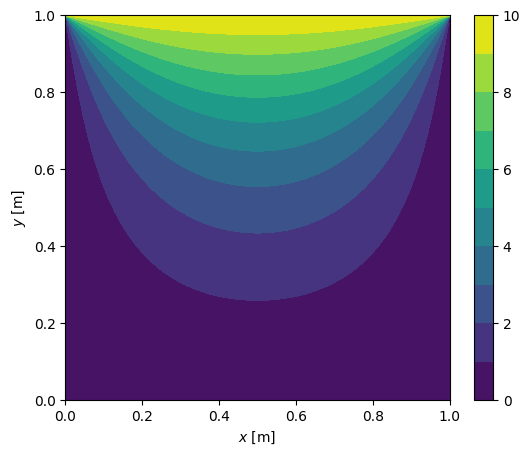

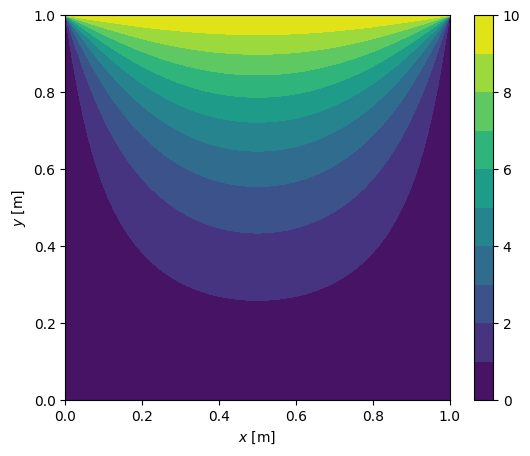

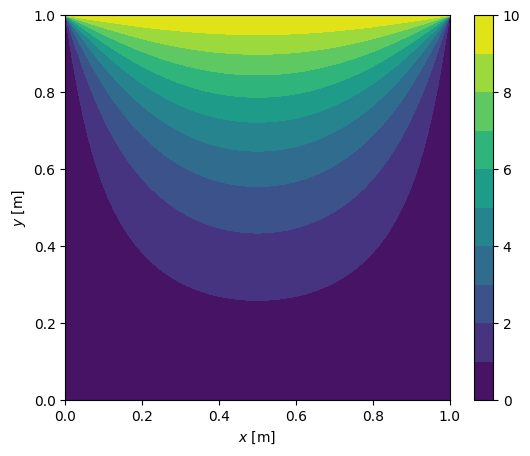

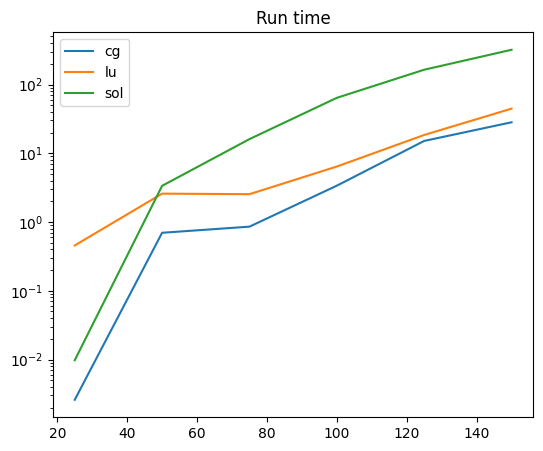

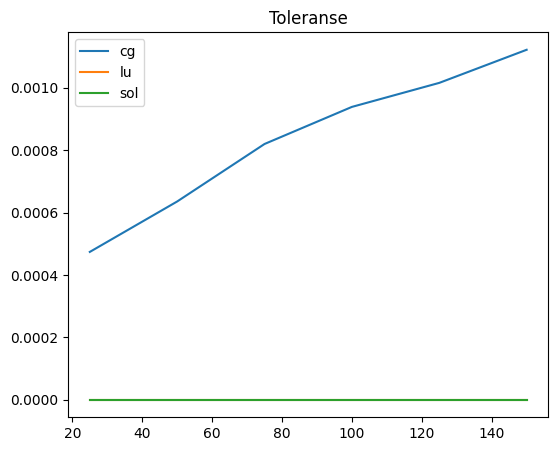

In [1]:
import numpy as np
import matplotlib
import scipy.linalg as lin
import matplotlib.pyplot as plt
import time
from scipy.sparse.linalg import cg
from scipy.linalg import lu
from scipy.linalg import solve_triangular
from math import *



class FDMSteadyFlow2D:
    def __init__(self, Nx, Ny, h_top):
        self.Nx = Nx
        self.Ny = Ny
        self.h_top = h_top
        
    def buildCoeffMatrix(self):
        '''
        Constructs the coefficient matrix A of the final linear
        system of equations of the form Ax = b
        '''
        # Create the diagonal, upper, and lower components of B
        Ddiag = -4 * np.eye(self.Nx - 1)
        Dupper = np.diag([1] * (self.Nx - 2), 1)
        Dlower = np.diag([1] * (self.Nx - 2), -1)

        # Add components to create B
        D = Ddiag + Dupper + Dlower

        # Create a block matrix where the diagonals are each B
        Ds = [D] * (self.Nx - 1)
        A = lin.block_diag(*Ds)

        # Create the identity diagonals
        I = np.ones((self.Nx - 1) * (self.Nx - 2))
        Iupper = np.diag(I, self.Nx - 1)
        Ilower = np.diag(I, -self.Nx + 1)

        # Add the identity diagonal to A to complete it
        A += Iupper + Ilower

        return A
    
    def buildRHSVector(self):
        '''
        Constructs the right-hand side vector b of the final linear
        system of equations of the form Ax = b
        '''
        b = np.zeros((self.Nx - 1)**2)
        b[-self.Nx+1:] = -self.h_top

        return b

    def solveLinearSystem(self, A, b):
        '''
        Solves the final linear system Ax = b and concatenates the
        boundary conditions (BCs) to the solution
        '''
        # Solve for h vector and reshape array to 2D
        h = lin.solve(A, b)
        errv= np.dot(A,h)-b
        err = sqrt(np.dot(errv,errv))
        h = h.reshape((self.Nx - 1, self.Ny - 1))

        # Create empty 2D array with all nodes and insert BCs ans solution
        h2D = np.zeros((self.Nx + 1, self.Ny + 1))
        h2D[0] = self.h_top         # Insert top BC
        h2D[1:-1, 1:-1] = h[::-1]    # Insert solution (::-1 => inverted)

        return h2D,err
    
    def solveLinearSystemcg(self, A, b):
        '''        
        Solves the final linear system Ax = b and concatenates the
        boundary conditions (BCs) to the solution
        '''
        # Solve for h vector and reshape array to 2D       
        h,info = cg(A,b)
        errv= np.dot(A,h)-b
        err = sqrt(np.dot(errv,errv))
        #print("Accuracy cg: ",err)
        #print("info: ", info)
        #print(" ")
        h = h.reshape((self.Nx - 1, self.Ny - 1))

        # Create empty 2D array with all nodes and insert BCs ans solution
        h2D = np.zeros((self.Nx + 1, self.Ny + 1))
        h2D[0] = self.h_top         # Insert top BC
        h2D[1:-1, 1:-1] = h[::-1]    # Insert solution (::-1 => inverted)

        return h2D,err
    
    def solveLinearSystemlu(self, A, b):
        '''
        Solves the final linear system Ax = b and concatenates the
        boundary conditions (BCs) to the solution
        '''
        # Solve for h vector and reshape array to 2D
        L,U=lu(A,permute_l=True)
        Y=solve_triangular(L,b,lower=True)
        h=solve_triangular(U,Y)
        errv= np.dot(A,h)-b
        err = sqrt(np.dot(errv,errv))
        #print("Accuracy lu: ",err)
        #print(" ")
        h = h.reshape((self.Nx - 1, self.Ny - 1))

        # Create empty 2D array with all nodes and insert BCs ans solution
        h2D = np.zeros((self.Nx + 1, self.Ny + 1))
        h2D[0] = self.h_top         # Insert top BC
        h2D[1:-1, 1:-1] = h[::-1]    # Insert solution (::-1 => inverted)

        return h2D,err

    
    def plotSolution(self, h2D):
        '''
        Plots the color plot of the solution on a 2D meshgrid
        '''
        # Create 1D arrays with the number of nodes
        x = np.linspace(0, 1, self.Nx + 1)
        y = np.linspace(1, 0, self.Ny + 1)

        # Create 2D mesh grid
        X, Y = np.meshgrid(x, y)

        # Plot solution on mesh grid
        matplotlib.rcParams['figure.figsize'] = 6.2, 5
        # plt.clf()
        plt.contourf(X, Y, h2D, 10)
        plt.colorbar()
        plt.xlabel(r'$x$ [$\mathrm{m}$]')
        plt.ylabel(r'$y$ [$\mathrm{m}$]')
        #plt.savefig('2D_Flow_Nx_Ny_' + str(Nx) + '.eps')
        plt.show()
        
if __name__ == "__main__":
  nruns=6
  timesol=np.zeros(nruns)
  tolsol=np.zeros(nruns)
  timelu=np.zeros(nruns)
  tollu=np.zeros(nruns)
  timecg=np.zeros(nruns)
  tolcg=np.zeros(nruns)
  dim=np.zeros(nruns)

  nx=0
  for i in range(0,nruns) :
    nx = nx+25
    print("nx : ", nx)
    fdm = FDMSteadyFlow2D(Nx=nx, Ny=nx, h_top=10)
    A = fdm.buildCoeffMatrix()
    b = fdm.buildRHSVector()
    
    dim[i]   = nx
    
    print("cg...")
    t0=time.perf_counter()
    hcg,errcg = fdm.solveLinearSystemcg(A, b)
    t = time.perf_counter()-t0
    timecg[i]  = t
    tolcg[i] = errcg
    print(t,errcg)
    
    print("gesv...")
    t0=time.perf_counter()
    h,errsol = fdm.solveLinearSystem(A, b)
    t = time.perf_counter()-t0
    timesol[i]  = t
    tolsol[i] = errsol
    print(t,errsol)
    
    print("lu...")
    t0=time.perf_counter()
    hlu,errlu = fdm.solveLinearSystemlu(A, b)
    t = time.perf_counter()-t0
    timelu[i]  = t
    tollu[i]=errlu
    print(t,errlu)

  fdm.plotSolution(hcg)
  fdm.plotSolution(h)
  fdm.plotSolution(hlu)
  fig=plt.figure()
  plt.plot(dim,timecg, label='cg')
  plt.plot(dim,timelu, label='lu')
  plt.plot(dim,timesol,label='sol')
  plt.legend()
  plt.yscale('log')
  plt.title("Run time")
  #plt.savefig("runTime.pdf")
  plt.show()
  plt.plot(dim,tolcg, label='cg')
  plt.plot(dim,tollu, label='lu')
  plt.plot(dim,tolsol,label='sol')
  plt.legend()
  plt.title("Toleranse")
  #plt.savefig("solvers.pdf")
  plt.show()
  


[Previous note](conjugateGradientMethod.ipynb) -- [Next note](derivativeFreeOptimization.ipynb)